In [35]:
from numpy import pi
from qiskit_ibm_runtime import QiskitRuntimeService
service=QiskitRuntimeService()

In [36]:
#loading runtime primitive and session
from qiskit_ibm_runtime import(
    Batch,
    SamplerV2 as Sampler,
    EstimatorV2 as Estimator,
)

#Least busy backend
backend=service.least_busy(min_num_qubits=127)
print(backend.name)

ibm_torino


In [37]:
# a simulator that partly mimics the noise behavior of the quantum computer selected above.
from qiskit_aer.primitives import SamplerV2, EstimatorV2
from qiskit_aer.noise import NoiseModel

#generate noise model from backend properties.
noise_model=NoiseModel.from_backend(backend)

noisy_sampler=SamplerV2(options={"backend_options":{"noise_model":noise_model}})
noisy_estimator=EstimatorV2(options={"backend_options":{"noise_model":noise_model}}) # name under "" matters, can't keeps any arbitrary name. 


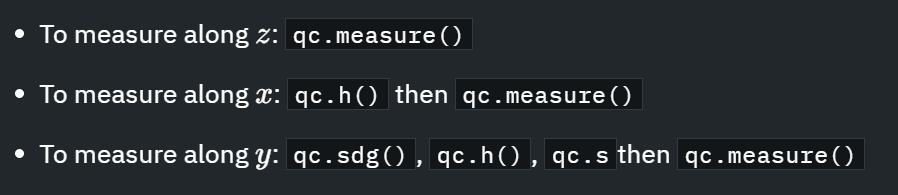

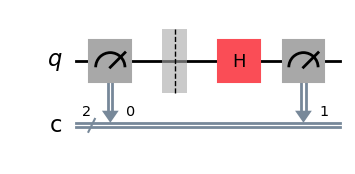

In [12]:
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
qr=QuantumRegister(1,"q")
cr=ClassicalRegister(2,"c")
qc=QuantumCircuit(qr,cr)

qc.measure(qr,cr[0])
qc.barrier()

qc.h(qr)

qc.measure(qr,cr[1])

qc.draw('mpl')

In [ ]:
#Transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
target=backend.target
pm=generate_preset_pass_manager(target=target,optimization_level=3)

qc_isa=pm.run(qc)

In [14]:
# Step 3: Run the job on a real quantum computer
 
 
#sampler = Sampler(mode=backend)
#pubs = [qc_isa]
#job = sampler.run(pubs)
#res = job.result()
 
#counts = res[0].data.c.get_counts()
 
# Run the job on the Aer simulator with noise model from real backend
 
job = noisy_sampler.run([qc_isa])
res=job.result()
counts=res[0].data.c.get_counts()

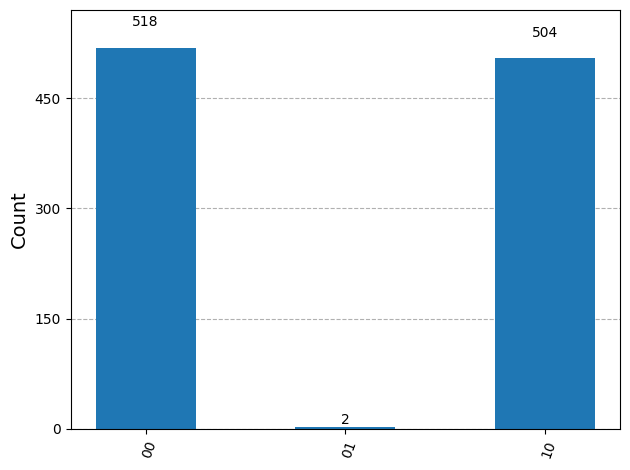

In [15]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

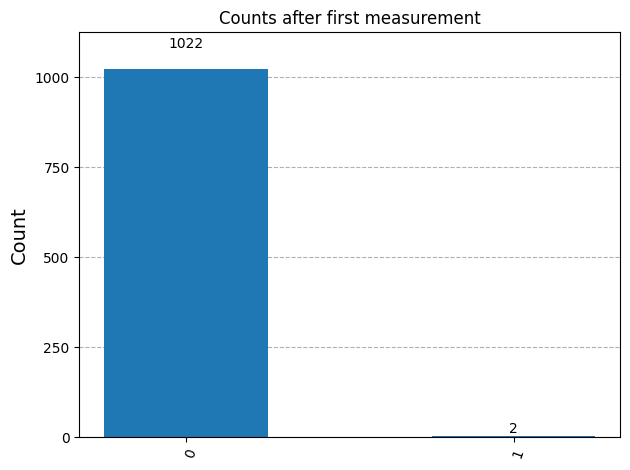

In [16]:
# To plot measurements separately.
from qiskit.result import marginal_counts

plot_histogram(marginal_counts(counts,indices=[0]),title="Counts after first measurement")

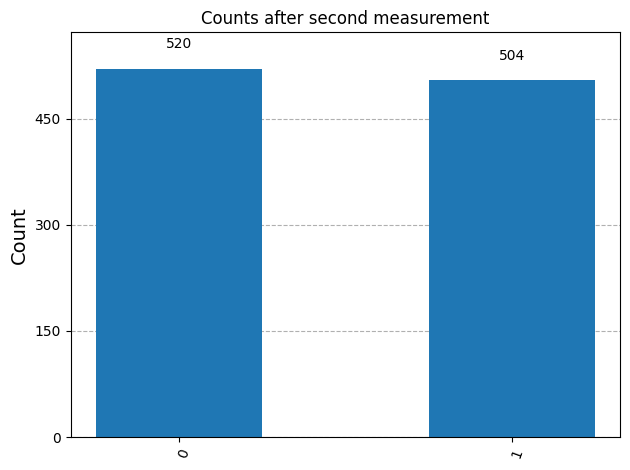

In [17]:
plot_histogram(marginal_counts(counts,indices=[1]),title="Counts after second measurement")

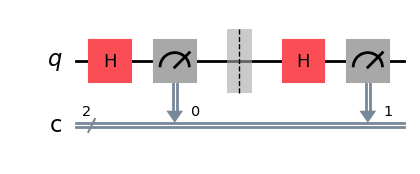

In [22]:
#measurement order reversed.
qr=QuantumRegister(1,"q")
cr=ClassicalRegister(2,"c")
qc=QuantumCircuit(qr,cr)

qc.h(qr)
qc.measure(qr,cr[0])
qc.barrier()

qc.h(qr)
qc.measure(qr,cr[1])

qc.draw('mpl')

In [23]:
#Transpile
pm=generate_preset_pass_manager(target=target,optimization_level=3)
qc_isa=pm.run(qc)

In [24]:
# Step 3: Run the job on a real quantum computer
 
 
#sampler = Sampler(mode=backend)
#pubs = [qc_isa]
#job = sampler.run(pubs)
#res = job.result()
 
#counts = res[0].data.c.get_counts()
 
# Run the job on the Aer simulator with noise model from real backend
 
job = noisy_sampler.run([qc_isa])
res=job.result()
counts=res[0].data.c.get_counts()

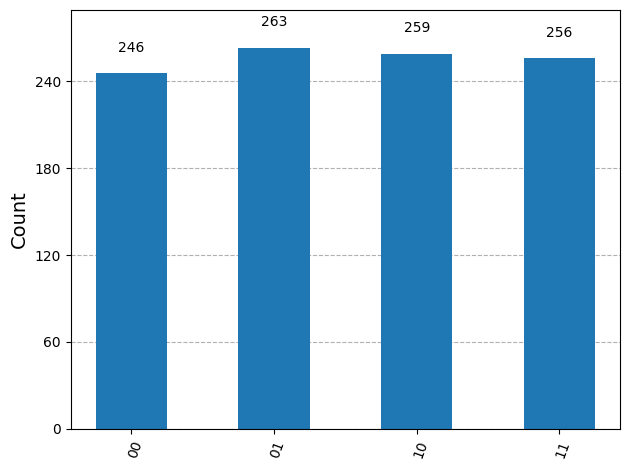

In [25]:
plot_histogram(counts)

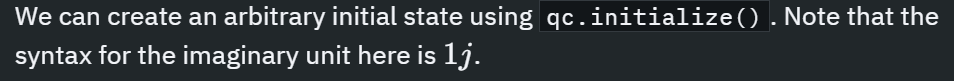

In [28]:
from qiskit.quantum_info import SparsePauliOp
import numpy as np

obs= SparsePauliOp("X")

qr=QuantumRegister(1,"q")
cr=ClassicalRegister(1,"c")
qc=QuantumCircuit(qr,cr)

qc.initialize([1,1j]/np.sqrt(2))

pm=generate_preset_pass_manager(target=target,optimization_level=3)
qc_isa=pm.run(qc)
obs_isa=obs.apply_layout(layout=qc_isa.layout)

# Step 3: Run the job on a real quantum computer
 
 
#sampler = Sampler(mode=backend)
#pubs = [qc_isa]
#job = sampler.run(pubs)
#res = job.result()
 
#counts = res[0].data.c.get_counts()
 
# Run the job on the Aer simulator with noise model from real backend
 
job = noisy_estimator.run([[qc_isa,obs_isa]])
res=job.result()

# Step 4: Return the result in classical form, and analyze.
 
print(res[0].data.evs)


-1.2243410138650942e-16


In [29]:
#uncertainity will be
ex=res[0].data.evs
print(1-ex**2)

1.0


In [30]:
from qiskit.quantum_info import SparsePauliOp
import numpy as np

obs= SparsePauliOp("Z")

qr=QuantumRegister(1,"q")
cr=ClassicalRegister(1,"c")
qc=QuantumCircuit(qr,cr)

qc.initialize([1,1j]/np.sqrt(2))

pm=generate_preset_pass_manager(target=target,optimization_level=3)
qc_isa=pm.run(qc)
obs_isa=obs.apply_layout(layout=qc_isa.layout)

# Step 3: Run the job on a real quantum computer
 
 
#sampler = Sampler(mode=backend)
#pubs = [qc_isa]
#job = sampler.run(pubs)
#res = job.result()
 
#counts = res[0].data.c.get_counts()
 
# Run the job on the Aer simulator with noise model from real backend
 
job = noisy_estimator.run([[qc_isa,obs_isa]])
res=job.result()

# Step 4: Return the result in classical form, and analyze.
 
print(res[0].data.evs)


0.00011908768034391004


Observables in same job submission

In [32]:
obs1=SparsePauliOp("X")
obs2=SparsePauliOp("Z")

qr=QuantumRegister(1,"q")
cr=ClassicalRegister(1,"c")
qc=QuantumCircuit(qr,cr)

qc.initialize([1,1]/np.sqrt(2))

pm=generate_preset_pass_manager(target=target,optimization_level=3)
qc_isa=pm.run(qc)

obs1_isa=obs1.apply_layout(layout=qc_isa.layout)
obs2_isa=obs2.apply_layout(layout=qc_isa.layout)

#with Batch(backend=backend) as batch:
#    estimator = Estimator(mode=batch)
#    pubs = [(qc_isa, obs1_isa), (qc_isa, obs2_isa)]
#    job = estimator.run(pubs)
#    res = job.result()
#batch.close()
 
# Run the job on the Aer simulator with noise model from real backend
 
job = noisy_estimator.run([[qc,obs1],[qc,obs2]])
res=job.result()

print("The expectation value of the first observable is: ", res[0].data.evs)
print("The expectation value of the second observable is: ", res[1].data.evs)

The expectation value of the first observable is:  0.9999999999999998
The expectation value of the second observable is:  0.0


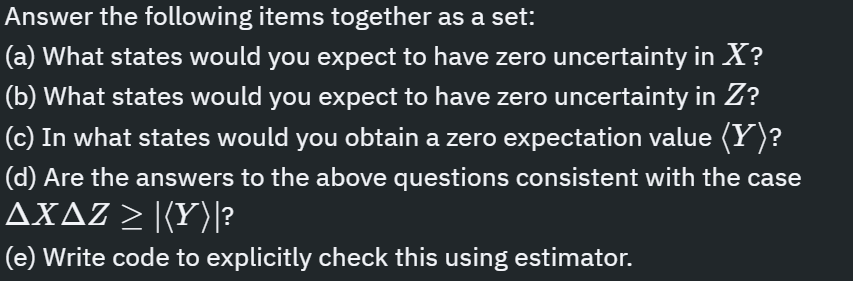

There are very important questions in this module: https://quantum.cloud.ibm.com/learning/en/modules/quantum-mechanics/exploring-uncertainty-with-qiskit
Please solve them by end of December.

# Testing Unceratainity Relations

In [38]:
from qiskit.circuit import Parameter
import numpy as np



In [40]:
#Observables
obs1=SparsePauliOp("X")
obs2=SparsePauliOp("Y")
obs3=SparsePauliOp("Z")

#Define Registers
qr=QuantumRegister(1,"q")
cr=ClassicalRegister(1,"c")
qc=QuantumCircuit(qr,cr)

#Rotate away from ket zero.
theta=Parameter("$\\theta$")
qc.ry(theta,0)

params=np.linspace(0,2,num=21)

#Transpile the circuit
pm=generate_preset_pass_manager(target=target,optimization_level=3)
qc_isa=pm.run(qc)

obs1_isa=obs1.apply_layout(layout=qc_isa.layout)
obs2_isa=obs2.apply_layout(layout=qc_isa.layout)
obs3_isa=obs3.apply_layout(layout=qc_isa.layout)

#All the three measurements are made independently on the same circuit and is run on a simulator.
job=noisy_estimator.run([(qc,[[obs1],[obs2],[obs3]],[params])])
res=job.result()

#Post-processing and analysis
xs=res[0].data.evs[0]
ys=abs(res[0].data.evs[1])
zs=res[0].data.evs[2]

# computing uncertainities.
delx=[]
delz=[]
prodxz=[]

for i in range(len(xs)):
    delx.append(abs((1-xs[i]*xs[i]))**0.5)
    delz.append(abs((1-zs[i]*zs[i]))**0.5)
    prodxz.append(delx[i]*delz[i])


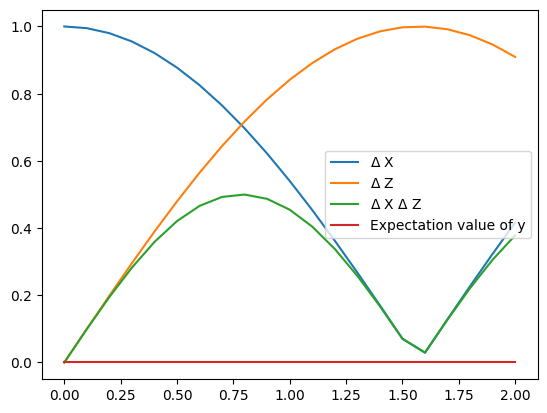

In [50]:
#Plotting results as simulation
import matplotlib.pyplot as plt

plt.plot(params,delx,label="$\\Delta$ X") # can use r and \
plt.plot(params,delz,label="$\\Delta$ Z")
plt.plot(params,prodxz,label="$\\Delta$ X $\\Delta$ Z")
plt.plot(params,ys,label='Expectation value of y')
plt.legend()

# Why only rotate y lets also rotate z

In [52]:
#Observables
obs1=SparsePauliOp("X")
obs2=SparsePauliOp("Y")
obs3=SparsePauliOp("Z")

#Define Registers
qr=QuantumRegister(1,"q")
cr=ClassicalRegister(1,"c")
qc=QuantumCircuit(qr,cr)

#Rotate away from ket zero.
theta=Parameter("$\\theta$")
qc.ry(theta,0)
qc.rz(np.pi/4,0)

params=np.linspace(0,2,num=21)

#Transpile the circuit
pm=generate_preset_pass_manager(target=target,optimization_level=3)
qc_isa=pm.run(qc)

obs1_isa=obs1.apply_layout(layout=qc_isa.layout)
obs2_isa=obs2.apply_layout(layout=qc_isa.layout)
obs3_isa=obs3.apply_layout(layout=qc_isa.layout)

#All the three measurements are made independently on the same circuit and is run on a simulator.
job=noisy_estimator.run([(qc,[[obs1],[obs2],[obs3]],[params])])
res=job.result()

#Post-processing and analysis
xs=res[0].data.evs[0]
ys=abs(res[0].data.evs[1])
zs=res[0].data.evs[2]

# computing uncertainities.
delx=[]
delz=[]
prodxz=[]

for i in range(len(xs)):
    delx.append(abs((1-xs[i]*xs[i]))**0.5)
    delz.append(abs((1-zs[i]*zs[i]))**0.5)
    prodxz.append(delx[i]*delz[i])


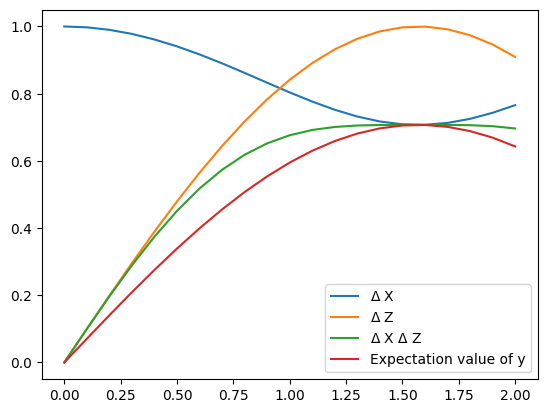

In [53]:
#Plotting results as simulation
import matplotlib.pyplot as plt

plt.plot(params,delx,label="$\\Delta$ X") # can use r and \
plt.plot(params,delz,label="$\\Delta$ Z")
plt.plot(params,prodxz,label="$\\Delta$ X $\\Delta$ Z")
plt.plot(params,ys,label='Expectation value of y')
plt.legend()

# Expectation value of Y maximised

In [57]:
#Observables
obs1=SparsePauliOp("X")
obs2=SparsePauliOp("Y")
obs3=SparsePauliOp("Z")

#Define Registers
qr=QuantumRegister(1,"q")
cr=ClassicalRegister(1,"c")
qc=QuantumCircuit(qr,cr)

#Rotate away from ket zero.
theta=Parameter("$\\theta$")
qc.ry(theta,0)
qc.rz(np.pi/2,0)

params=np.linspace(0,2,num=21)

#Transpile the circuit
pm=generate_preset_pass_manager(target=target,optimization_level=3)
qc_isa=pm.run(qc)

obs1_isa=obs1.apply_layout(layout=qc_isa.layout)
obs2_isa=obs2.apply_layout(layout=qc_isa.layout)
obs3_isa=obs3.apply_layout(layout=qc_isa.layout)

#All the three measurements are made independently on the same circuit and is run on a simulator.
job=noisy_estimator.run([(qc,[[obs1],[obs2],[obs3]],[params])])
res=job.result()

#Post-processing and analysis
xs=res[0].data.evs[0]
ys=abs(res[0].data.evs[1])
zs=res[0].data.evs[2]

# computing uncertainities.
delx=[]
delz=[]
prodxz=[]

for i in range(len(xs)):
    delx.append(abs((1-xs[i]*xs[i]))**0.5)
    delz.append(abs((1-zs[i]*zs[i]))**0.5)
    prodxz.append(delx[i]*delz[i])


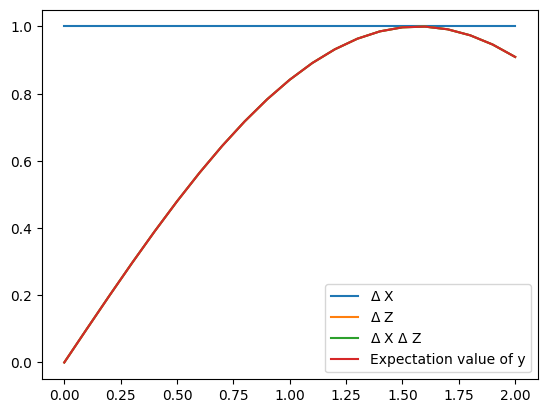

In [58]:
#Plotting results as simulation
import matplotlib.pyplot as plt

plt.plot(params,delx,label="$\\Delta$ X") # can use r and \
plt.plot(params,delz,label="$\\Delta$ Z")
plt.plot(params,prodxz,label="$\\Delta$ X $\\Delta$ Z")
plt.plot(params,ys,label='Expectation value of y')
plt.legend()

In [59]:
# DIY for X and Y